In [1]:
#Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Define dataframe based on csv data (on BigFoot sightings)
bigfoot_geo_df = pd.read_csv("bfro_reports_geocoded.csv")
bigfoot_geo_df.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_intensity,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed
0,I am not sure how relevant this report will be...,"We were on our way to Rapid City, so we were h...",Washakie County,Wyoming,Summer,NaN,NaN,NaN,NaN,798.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,0.204,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",NaN,9.3,168.1,17.1
2,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,...,3.208,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",NaN,5.0,356.2,7.6
3,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,0.000,0.0,NaN,1020.9,Partly cloudy throughout the day.,Partially cloudy,NaN,13.0,107.3,11.5
4,It was the winter of 1996 and we were on our w...,"Hwy 182, Wood County Between Quitman, Texas an...",Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.79430,-95.54250,1996-12-22,2048.0,...,NaN,0.0,NaN,NaN,Partly cloudy throughout the day.,Partially cloudy,NaN,10.5,180.4,20.8


In [3]:
bigfoot_geo_df.count()

observed              5043
location_details      4319
county                5082
state                 5082
season                5082
title                 4104
latitude              4104
longitude             4104
date                  4104
number                5082
classification        5082
geohash               4104
temperature_high      4102
temperature_mid       3964
temperature_low       4102
dew_point             3951
humidity              3951
cloud_cover           3939
moon_phase            4104
precip_intensity      3524
precip_probability    3964
precip_type           1309
pressure              3678
summary               3964
conditions            3964
uv_index               394
visibility            3916
wind_bearing          3955
wind_speed            3966
dtype: int64

In [4]:
#Create new dataframe copy and remove columns with large gaps in data
bigfoot_clean_df = bigfoot_geo_df.copy()
bigfoot_clean_df = bigfoot_clean_df.drop(columns=["uv_index","precip_type"])

In [5]:
#Drop rows with null data and provide a data count
bigfoot_clean_df = bigfoot_clean_df.dropna(how="any")
bigfoot_clean_df.describe()

,latitude,longitude,number,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,pressure,visibility,wind_bearing,wind_speed
count,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000
mean,39.494905,-97.030853,24764.758354,68.910798,58.772107,49.232114,46.842877,68.769610,45.721702,0.482817,0.093595,37.143862,1016.925185,9.977664,197.733099,12.525712
std,5.738927,17.231881,20675.672362,17.655631,16.106402,15.866494,16.221422,15.378247,32.962072,0.288743,0.290920,48.327438,6.007157,4.784433,98.915517,4.854203
min,25.141000,-149.785300,60.000000,3.400000,-3.200000,-8.800000,-13.300000,7.800000,0.000000,0.000000,0.000000,0.000000,980.400000,0.500000,0.100000,0.700000
25%,35.529010,-118.395300,7259.000000,57.100000,47.800000,38.000000,36.100000,60.000000,15.150000,0.250000,0.000000,0.000000,1013.300000,8.100000,127.500000,9.100000
50%,39.537220,-90.184440,20435.000000,71.600000,60.500000,50.100000,47.800000,71.200000,43.300000,0.480000,0.000000,0.000000,1016.800000,9.600000,205.900000,11.700000
75%,44.362060,-82.410780,38281.500000,82.650000,71.300000,61.200000,59.000000,79.700000,75.200000,0.750000,0.035500,100.000000,1020.400000,9.900000,279.800000,15.000000
max,64.891390,-68.228300,75577.000000,109.500000,96.100000,85.600000,77.300000,100.000000,100.000000,0.980000,5.781000,100.000000,1042.200000,69.600000,360.000000,55.000000


In [6]:
#Output clean data to csv file
bigfoot_clean_df.to_csv("Bigfoot Clean Data.csv")

In [7]:
bigfoot_clean_df

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,cloud_cover,moon_phase,precip_intensity,precip_probability,pressure,summary,conditions,visibility,wind_bearing,wind_speed
1,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,66.7,0.07,0.204,100.0,1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",9.3,168.1,17.1
2,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,...,100.0,0.19,3.208,100.0,1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",5.0,356.2,7.6
3,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,76.2,0.25,0.000,0.0,1020.9,Partly cloudy throughout the day.,Partially cloudy,13.0,107.3,11.5
7,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45000,-71.50000,1974-09-20,6496.0,...,96.7,0.15,0.000,0.0,1020.6,Cloudy skies throughout the day.,Overcast,2.6,196.6,15.0
10,My two children and I were returning from Altu...,The creature crossed from one cattle pasture t...,Washita County,Oklahoma,Fall,Report 9765: Motorist and children have daylig...,35.30110,-99.17020,1973-09-28,9765.0,...,14.0,0.07,0.000,0.0,1017.2,Clear conditions throughout the day.,Clear,20.4,263.8,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,I was hunting in the spring for turkey. I herd...,eddy road to road 1 to where the rocks cross t...,Baker County,Florida,Spring,Report 26276: Man growing up near Taylor recal...,30.43412,-82.28943,2006-04-12,26276.0,...,53.0,0.47,0.000,0.0,1025.5,Partly cloudy throughout the day.,Partially cloudy,8.5,68.9,15.8
5070,My sighting was 41 years ago at NW 21 Terr/NW ...,The Subdivision was Orman Leigh Estate,Alachua County,Florida,Unknown,Report 41995: Memory told of a close encounter...,29.67757,-82.35501,1963-09-15,41995.0,...,85.2,0.08,0.078,100.0,1013.7,Partly cloudy throughout the day with rain cle...,"Rain, Partially cloudy",13.6,229.1,9.2
5071,"Alachua County, Florida, around 1985 We lived ...",Near county road 237 and NW 156th Steet(or Ave...,Alachua County,Florida,Fall,Report 2566: College Psychology Teacher observ...,29.77535,-82.36570,1985-09-29,2566.0,...,37.9,0.52,0.000,0.0,1021.5,Becoming cloudy in the afternoon.,Partially cloudy,6.1,53.2,16.0
5072,I am subitting this true report for my Cousin ...,Very swampy area.,Alachua County,Florida,Summer,Report 27076: Woman has close daylight sightin...,29.58358,-82.33316,2000-06-13,27076.0,...,33.5,0.39,0.000,0.0,1020.0,Partly cloudy throughout the day.,Partially cloudy,8.5,202.3,11.5


In [8]:
bigfoot_weather = pd.DataFrame(bigfoot_clean_df[["county",
                                                  "state", "date", "latitude","longitude","season","temperature_high",
                                                  "temperature_low","cloud_cover",
                                                  "precip_intensity","visibility",
                                                  "conditions","wind_speed"
                                                  ]])
bigfoot_weather

,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,precip_intensity,visibility,conditions,wind_speed
1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,0.204,9.3,"Snow, Rain, Partially cloudy",17.1
2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,3.208,5.0,"Rain, Overcast",7.6
3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,0.000,13.0,Partially cloudy,11.5
7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,0.000,2.6,Overcast,15.0
10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,0.000,20.4,Clear,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,Baker County,Florida,2006-04-12,30.43412,-82.28943,Spring,75.7,58.0,53.0,0.000,8.5,Partially cloudy,15.8
5070,Alachua County,Florida,1963-09-15,29.67757,-82.35501,Unknown,80.0,64.9,85.2,0.078,13.6,"Rain, Partially cloudy",9.2
5071,Alachua County,Florida,1985-09-29,29.77535,-82.36570,Fall,84.0,66.8,37.9,0.000,6.1,Partially cloudy,16.0
5072,Alachua County,Florida,2000-06-13,29.58358,-82.33316,Summer,93.5,69.2,33.5,0.000,8.5,Partially cloudy,11.5


In [9]:
max(bigfoot_weather['precip_intensity'])

5.781

In [10]:
# Bins for precipation intensity which is measured by precip depth over duration. Using weather classifications, 
# light rain <= 0.1in/hr (2.5mm/hr), moderate = 0.1 to 0.3in/hr (2.6-7.5mm/hr), 
# heavy = 0.3 to 2in/hr (7.6-50mm/hr), violent > 2in/hr (>50mm/hr)
bins = [-0.1, 0.1, 0.3, 2, 100]

# Create labels for these bins
group_labels = ["light: 0 to 0.1", "moderate: 0.1 to 0.3", "heavy: 0.3 to 2", "violent: >2"]

# Slice the data and place it into bins
pd.cut(bigfoot_weather["precip_intensity"], bins, labels=group_labels)

# Place the data series into a new column inside of the DataFrame
bigfoot_weather["Precip Intensity Groups"] = pd.cut(bigfoot_weather["precip_intensity"], bins, labels=group_labels)

bigfoot_weather.head()

,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,precip_intensity,visibility,conditions,wind_speed,Precip Intensity Groups
1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,0.204,9.3,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3
2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,3.208,5.0,"Rain, Overcast",7.6,violent: >2
3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,0.000,13.0,Partially cloudy,11.5,light: 0 to 0.1
7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,0.000,2.6,Overcast,15.0,light: 0 to 0.1
10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,0.000,20.4,Clear,12.7,light: 0 to 0.1


In [11]:
# Bins for visibility which is measured in miles. Using visibility classifications from a research paper in the resouces folder, 

bins = [0, 0.03, 0.124, 0.31, 0.62, 1.24, 2.48, 6.21, 12.43, 31.06, 100]

# Create labels for these bins
group_labels = ["Dense Fog: 0 to 0.124", "Thick Fog: 0.124 to 0.31", "Moderate Fog: 0.31 to 0.62", "Light Fog: 0.62 to 1.24",
               "Thin Fog: 1.24 to 2.48", "Haze: 1.24 to 2.48", "Light Haze: 2.48 to 6.21", "Clear: 6.21 to 12.43", "Very Clear: 12.43 to 31.06",
                "Exceptionally Clear: 31.06+"
               ]

# Slice the data and place it into bins
pd.cut(bigfoot_weather["visibility"], bins, labels=group_labels)

# Place the data series into a new column inside of the DataFrame
bigfoot_weather["Visibility Classification (mi)"] = pd.cut(bigfoot_weather["visibility"], bins, labels=group_labels)

bigfoot_weather

,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,precip_intensity,visibility,conditions,wind_speed,Precip Intensity Groups,Visibility Classification (mi)
1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,0.204,9.3,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43
2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,3.208,5.0,"Rain, Overcast",7.6,violent: >2,Light Haze: 2.48 to 6.21
3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,0.000,13.0,Partially cloudy,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06
7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,0.000,2.6,Overcast,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21
10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,0.000,20.4,Clear,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,Baker County,Florida,2006-04-12,30.43412,-82.28943,Spring,75.7,58.0,53.0,0.000,8.5,Partially cloudy,15.8,light: 0 to 0.1,Clear: 6.21 to 12.43
5070,Alachua County,Florida,1963-09-15,29.67757,-82.35501,Unknown,80.0,64.9,85.2,0.078,13.6,"Rain, Partially cloudy",9.2,light: 0 to 0.1,Very Clear: 12.43 to 31.06
5071,Alachua County,Florida,1985-09-29,29.77535,-82.36570,Fall,84.0,66.8,37.9,0.000,6.1,Partially cloudy,16.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21
5072,Alachua County,Florida,2000-06-13,29.58358,-82.33316,Summer,93.5,69.2,33.5,0.000,8.5,Partially cloudy,11.5,light: 0 to 0.1,Clear: 6.21 to 12.43


In [12]:
# Bins for cloud cover which is based on fractional coverage (in 1/8s). Using cloud cover classifications from a Penn State Univ. meteorology page. 

bins = [-0.1, 6.25, 25, 62.5, 87.5, 100.1]

# Create labels for these bins
group_labels = ["Sunny: 0 to 6.25", "Mostly Sunny: 6.25 to 25", "Partly Cloudy/Sunny: 25 to 62.5", "Mostly Cloudy: 62.5 to 87.5", "Cloudy/Overcast: 87.5 to 100"
               ]

# Slice the data and place it into bins
pd.cut(bigfoot_weather["cloud_cover"], bins, labels=group_labels)

# Place the data series into a new column inside of the DataFrame
bigfoot_weather["Cloud Cover Classification (%)"] = pd.cut(bigfoot_weather["cloud_cover"], bins, labels=group_labels)

bigfoot_weather

,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,precip_intensity,visibility,conditions,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%)
1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,0.204,9.3,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5
2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,3.208,5.0,"Rain, Overcast",7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100
3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,0.000,13.0,Partially cloudy,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5
7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,0.000,2.6,Overcast,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100
10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,0.000,20.4,Clear,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,Baker County,Florida,2006-04-12,30.43412,-82.28943,Spring,75.7,58.0,53.0,0.000,8.5,Partially cloudy,15.8,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5
5070,Alachua County,Florida,1963-09-15,29.67757,-82.35501,Unknown,80.0,64.9,85.2,0.078,13.6,"Rain, Partially cloudy",9.2,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5
5071,Alachua County,Florida,1985-09-29,29.77535,-82.36570,Fall,84.0,66.8,37.9,0.000,6.1,Partially cloudy,16.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Partly Cloudy/Sunny: 25 to 62.5
5072,Alachua County,Florida,2000-06-13,29.58358,-82.33316,Summer,93.5,69.2,33.5,0.000,8.5,Partially cloudy,11.5,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5


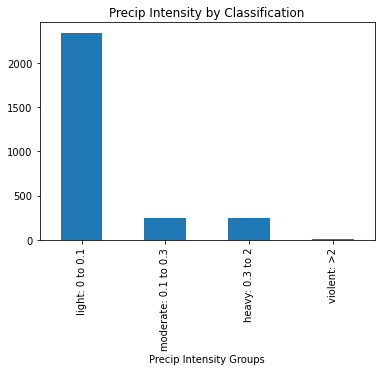

In [13]:
precip_groups = bigfoot_weather.groupby('Precip Intensity Groups')
precip_counts = precip_groups['Precip Intensity Groups'].count()

precip_chart = precip_counts.plot(kind="bar", title="Precip Intensity by Classification")

plt.show()

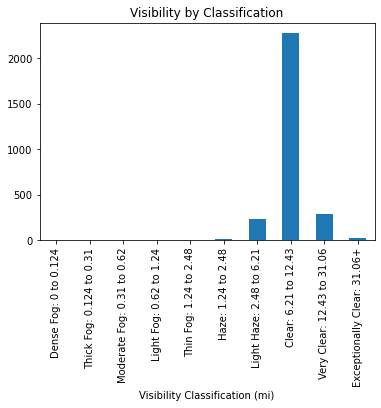

In [14]:
visibility_groups = bigfoot_weather.groupby('Visibility Classification (mi)')
visibility_counts = visibility_groups['Visibility Classification (mi)'].count()

visibility_chart = visibility_counts.plot(kind="bar", title="Visibility by Classification")

plt.show()

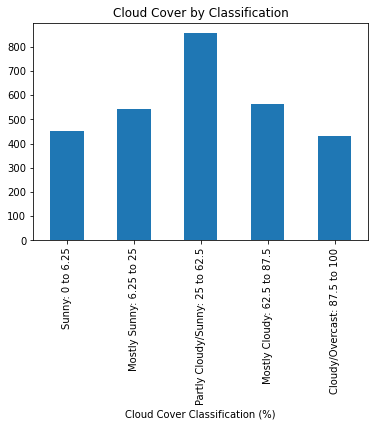

In [15]:
cloudcover_groups = bigfoot_weather.groupby('Cloud Cover Classification (%)')
cloudcover_counts = cloudcover_groups['Cloud Cover Classification (%)'].count()

cloudcover_chart = cloudcover_counts.plot(kind="bar", title="Cloud Cover by Classification")

plt.show()

In [16]:
bigfoot_weather.to_csv("Bigfoot Weather Data.csv")